In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 데이터 불러오기
train = pd.read_csv('train.csv')# 모델 학습 파일
test = pd.read_csv('test.csv')# 모델 시험지 파일
submission = pd.read_csv('submission.csv')#답안지 파일 

In [3]:
str(train)

'        id  hour  hour_bef_temperature  hour_bef_precipitation  \\\n0        3    20                  16.3                     1.0   \n1        6    13                  20.1                     0.0   \n2        7     6                  13.9                     0.0   \n3        8    23                   8.1                     0.0   \n4        9    18                  29.5                     0.0   \n...    ...   ...                   ...                     ...   \n1454  2174     4                  16.8                     0.0   \n1455  2175     3                  10.8                     0.0   \n1456  2176     5                  18.3                     0.0   \n1457  2178    21                  20.7                     0.0   \n1458  2179    17                  21.1                     0.0   \n\n      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \\\n0                    1.5               89.0                576.0   \n1                    1.4               48.0          

In [23]:
aaa = train[train['hour_bef_pm2.5'].isna() & train['hour_bef_pm10'].isna() & train['hour_bef_ozone'].isna()]
aaa[aaa['hour']!=1]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
140,206,10,18.2,0.0,2.4,60.0,527.0,NaN,NaN,NaN,66.0
532,823,12,22.3,0.0,2.8,51.0,575.0,NaN,NaN,NaN,121.0
537,829,7,18.7,0.0,2.0,69.0,915.0,NaN,NaN,NaN,127.0
595,912,11,20.3,0.0,2.6,56.0,576.0,NaN,NaN,NaN,95.0
645,987,6,18.7,0.0,1.0,72.0,634.0,NaN,NaN,NaN,53.0
897,1360,13,24.5,0.0,3.5,38.0,773.0,NaN,NaN,NaN,161.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [39]:
train[(train['hour']==1) & (train['hour_bef_windspeed'].isna())]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0


In [47]:
b = train[(train['hour']==1)]
b.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,NaN,0.068472,-0.113193,-0.218473,-0.102241,0.033424,NaN,NaN,NaN,0.192074
hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour_bef_temperature,0.068472,NaN,1.000000,-0.020299,-0.152579,-0.149201,-0.022300,NaN,NaN,NaN,0.468516
hour_bef_precipitation,-0.113193,NaN,-0.020299,1.000000,0.177589,0.424381,-0.415417,NaN,NaN,NaN,-0.283050
hour_bef_windspeed,-0.218473,NaN,-0.152579,0.177589,1.000000,-0.093006,-0.009257,NaN,NaN,NaN,-0.226624
hour_bef_humidity,-0.102241,NaN,-0.149201,0.424381,-0.093006,1.000000,-0.547973,NaN,NaN,NaN,-0.093122
hour_bef_visibility,0.033424,NaN,-0.022300,-0.415417,-0.009257,-0.547973,1.000000,NaN,NaN,NaN,0.053012
hour_bef_ozone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour_bef_pm10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour_bef_pm2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


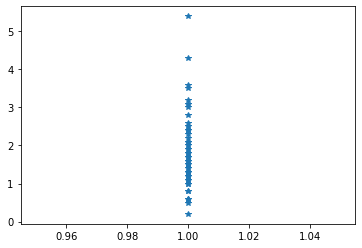

In [49]:
plt.plot('hour','hour_bef_windspeed', '*', data = b)

In [25]:
aaaa = test[test['hour_bef_pm2.5'].isna() & test['hour_bef_pm10'].isna() & test['hour_bef_ozone'].isna()]
aaaa[aaaa['hour']!=1]
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
aa1=train.groupby('hour')['count'].mean()
aa1

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [28]:
aa2=train.groupby('hour')['count'].median()
aa2

hour
0      70.0
1      43.0
2      29.0
3      21.0
4      13.0
5      12.0
6      23.0
7      73.0
8     169.0
9      95.0
10     81.0
11     88.0
12    119.0
13    114.0
14    121.0
15    125.0
16    142.5
17    182.0
18    277.0
19    204.0
20    165.0
21    163.0
22    144.0
23    102.0
Name: count, dtype: float64

In [5]:
train.shape

(1459, 11)

In [6]:
train.info

<bound method DataFrame.info of         id  hour  hour_bef_temperature  hour_bef_precipitation  \
0        3    20                  16.3                     1.0   
1        6    13                  20.1                     0.0   
2        7     6                  13.9                     0.0   
3        8    23                   8.1                     0.0   
4        9    18                  29.5                     0.0   
...    ...   ...                   ...                     ...   
1454  2174     4                  16.8                     0.0   
1455  2175     3                  10.8                     0.0   
1456  2176     5                  18.3                     0.0   
1457  2178    21                  20.7                     0.0   
1458  2179    17                  21.1                     0.0   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
0                    1.5               89.0                576.0   
1                    1.4               

In [146]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [147]:
train[['hour','count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


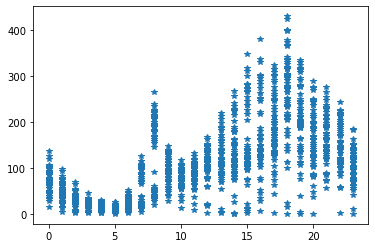

In [8]:
plt.plot('hour', 'count', '*', data = train)

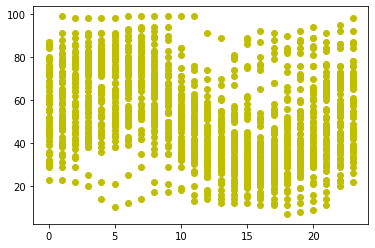

In [149]:
plt.plot('hour', 'hour_bef_humidity', 'yo', data = train)

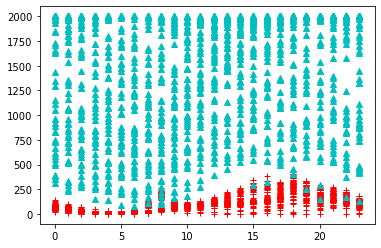

In [150]:
plt.plot('hour', 'count', 'r+', data = train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data = train)

In [151]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:>

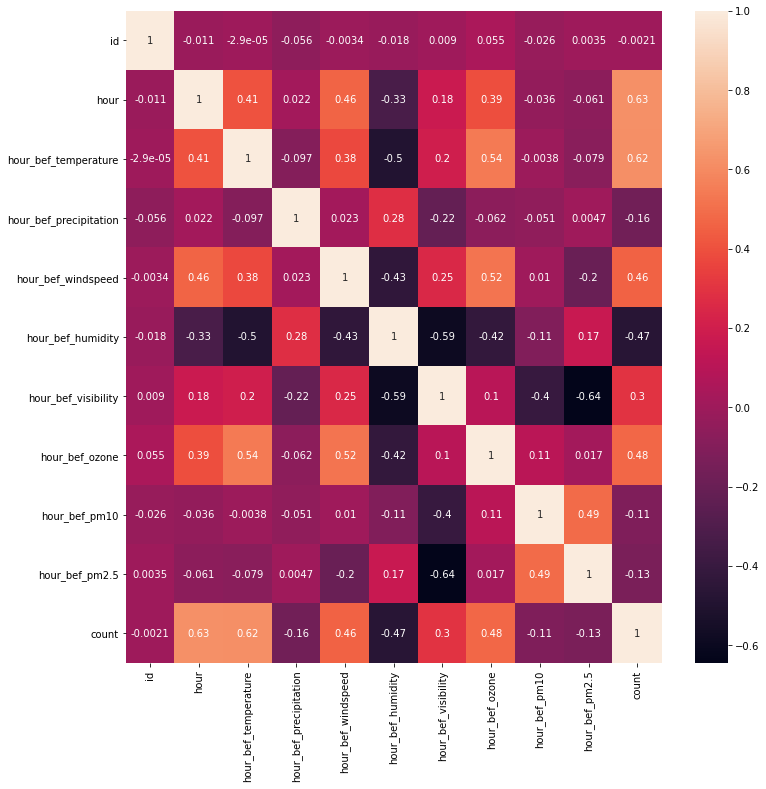

In [152]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

In [153]:
########################################################################
########################################################################
########################################################################
########################################################################

In [154]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [155]:
#hour_bef_temperature 결측값은 모든 열이 다 비어있음. 걍 제거
train = train[-train['hour_bef_temperature'].isna()]
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
dtype: int64

In [156]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [157]:
train[train['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [158]:
#1시에는 미세먼지와 오존 데이터가 없다.
#1시 데이터
train[(train['hour']==1)].count
print((train['hour']==1).sum())
#1시인데 미세먼지 오존 없는 데이터
train[(train['hour']==1)&(train['hour_bef_pm10'].isna())&
       (train['hour_bef_pm2.5'].isna())& (train['hour_bef_ozone'].isna())]
print(((train['hour']==1)&(train['hour_bef_pm10'].isna())&
       (train['hour_bef_pm2.5'].isna())& (train['hour_bef_ozone'].isna())).sum())
#어케 처리하지

61
61


In [159]:
#시간을 더미함수로 변경
train1 = pd.get_dummies(train,columns=['hour'])
train1

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,...,0,0,0,0,0,0,1,0,0,0
1,6,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,...,0,0,0,0,0,0,0,0,0,0
2,7,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,...,0,0,0,0,0,0,0,0,0,0
3,8,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,...,0,0,0,0,0,0,0,0,0,1
4,9,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,...,0,0,0,0,0,0,0,0,0,0
1455,2175,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1456,2176,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1457,2178,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,...,0,0,0,0,0,0,0,1,0,0


In [160]:
#train1에서 hour가 1인 미세먼지, 오존 값을 0 으로
train_h1 = train1[train1['hour_1']==1]
train_h1['hour_bef_pm2.5'] = train_h1['hour_bef_pm2.5'].fillna(value = 0)
train_h1['hour_bef_pm10'] = train_h1['hour_bef_pm10'].fillna(value = 0)
train_h1['hour_bef_ozone'] = train_h1['hour_bef_ozone'].fillna(value = 0)

<ipython-input-160-9f58266fd68d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_h1['hour_bef_pm2.5'] = train_h1['hour_bef_pm2.5'].fillna(value = 0)
<ipython-input-160-9f58266fd68d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_h1['hour_bef_pm10'] = train_h1['hour_bef_pm10'].fillna(value = 0)
<ipython-input-160-9f58266fd68d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [161]:
train1[train1['hour_1']==1] = train_h1
train1[train1['hour_1']==1]

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
14,28,20.0,0.0,1.8,58.0,2000.0,0.0,0.0,0.0,74.0,...,0,0,0,0,0,0,0,0,0,0
46,78,12.2,0.0,3.0,49.0,1071.0,0.0,0.0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,0
84,130,9.4,0.0,2.5,65.0,1907.0,0.0,0.0,0.0,39.0,...,0,0,0,0,0,0,0,0,0,0
142,208,18.8,0.0,1.1,61.0,2000.0,0.0,0.0,0.0,62.0,...,0,0,0,0,0,0,0,0,0,0
147,220,18.4,0.0,3.1,31.0,2000.0,0.0,0.0,0.0,63.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,16.6,0.0,2.1,35.0,2000.0,0.0,0.0,0.0,62.0,...,0,0,0,0,0,0,0,0,0,0
1322,1994,15.1,0.0,1.3,35.0,2000.0,0.0,0.0,0.0,40.0,...,0,0,0,0,0,0,0,0,0,0
1329,2005,17.7,0.0,1.0,43.0,1338.0,0.0,0.0,0.0,69.0,...,0,0,0,0,0,0,0,0,0,0
1361,2047,12.6,0.0,2.4,48.0,1805.0,0.0,0.0,0.0,43.0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
train1.isna().sum()

id                         0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         7
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            13
hour_bef_pm10             27
hour_bef_pm2.5            54
count                      0
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
dtype: int64

In [163]:
train1.head(5)

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,...,0,0,0,0,0,0,1,0,0,0
1,6,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,...,0,0,0,0,0,0,0,0,0,0
2,7,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,...,0,0,0,0,0,0,0,0,0,0
3,8,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,...,0,0,0,0,0,0,0,0,0,1
4,9,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,...,0,0,0,0,1,0,0,0,0,0


In [164]:
train1.corr()['hour_bef_windspeed'] > 0.5

id                        False
hour_bef_temperature      False
hour_bef_precipitation    False
hour_bef_windspeed         True
hour_bef_humidity         False
hour_bef_visibility       False
hour_bef_ozone             True
hour_bef_pm10             False
hour_bef_pm2.5            False
count                     False
hour_0                    False
hour_1                    False
hour_2                    False
hour_3                    False
hour_4                    False
hour_5                    False
hour_6                    False
hour_7                    False
hour_8                    False
hour_9                    False
hour_10                   False
hour_11                   False
hour_12                   False
hour_13                   False
hour_14                   False
hour_15                   False
hour_16                   False
hour_17                   False
hour_18                   False
hour_19                   False
hour_20                   False
hour_21 

In [165]:
#windspeed가 없는 것들은 다 오존 값이 있고 상관계수가 크기에 이걸로 
#그룹을 내어 결측값 대체
train1[(train1['hour_bef_windspeed'].isna())&(train1['hour_bef_ozone'].isna())]

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23


In [166]:
wind=train1.groupby('hour_bef_ozone')['hour_bef_ozone','hour_bef_windspeed'].mean()
wind

<ipython-input-166-3197a54121ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wind=train1.groupby('hour_bef_ozone')['hour_bef_ozone','hour_bef_windspeed'].mean()


,hour_bef_ozone,hour_bef_windspeed
hour_bef_ozone,,
0.000,0.000,1.836667
0.003,0.003,1.475000
0.004,0.004,1.145000
0.005,0.005,1.335294
0.006,0.006,1.162500
...,...,...
0.099,0.099,3.800000
0.100,0.100,3.300000
0.106,0.106,4.100000


In [167]:
a= train1[train1['hour_bef_windspeed'].isna()]

In [168]:
for j in range(0,a['hour_bef_ozone'].count()):
    for k in range(0,wind['hour_bef_ozone'].count()):
        if a.iloc[j,6] == round(wind.iloc[k,0],4):
            a.iloc[j,3] = round(wind.iloc[k,1],1)

C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [169]:
train1[train1['hour_bef_windspeed'].isna()] = a

In [170]:
train1.isna().sum()

id                         0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            13
hour_bef_pm10             27
hour_bef_pm2.5            54
count                      0
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
dtype: int64

In [171]:
#오존, 미세먼지 결측값 처리
train1[(train1['hour_bef_pm2.5'].isna())|(train1['hour_bef_pm10'].isna())|(train1['hour_bef_ozone'].isna())]

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
33,56,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN,127.0,...,0,0,0,0,0,0,0,1,0,0
44,76,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0,...,0,0,0,1,0,0,0,0,0,0
100,149,15.8,0.0,5.3,17.0,1923.0,0.047,NaN,NaN,102.0,...,0,0,1,0,0,0,0,0,0,0
122,181,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0,...,0,0,1,0,0,0,0,0,0,0
129,193,27.0,0.0,3.6,39.0,2000.0,0.047,NaN,NaN,319.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1986,9.9,0.0,1.4,86.0,620.0,0.010,40.0,NaN,47.0,...,0,0,0,0,0,0,0,0,0,0
1338,2016,16.2,0.0,3.5,31.0,950.0,0.060,NaN,NaN,167.0,...,0,0,0,0,0,1,0,0,0,0
1378,2066,10.1,0.0,1.5,59.0,990.0,0.015,39.0,NaN,78.0,...,0,0,0,0,0,0,0,0,0,0
1398,2096,14.0,0.0,2.9,35.0,910.0,0.061,NaN,NaN,117.0,...,0,0,0,0,0,0,1,0,0,0


In [172]:
train1.corr()['hour_bef_pm2.5']

id                        0.006435
hour_bef_temperature     -0.028361
hour_bef_precipitation   -0.004851
hour_bef_windspeed       -0.141570
hour_bef_humidity         0.115587
hour_bef_visibility      -0.575637
hour_bef_ozone            0.168592
hour_bef_pm10             0.561562
hour_bef_pm2.5            1.000000
count                    -0.059469
hour_0                    0.026183
hour_1                   -0.394991
hour_2                    0.031833
hour_3                    0.033183
hour_4                    0.041957
hour_5                    0.033679
hour_6                    0.034415
hour_7                    0.037081
hour_8                    0.037308
hour_9                    0.035208
hour_10                   0.025726
hour_11                   0.024125
hour_12                   0.003577
hour_13                   0.012213
hour_14                   0.011091
hour_15                  -0.003543
hour_16                  -0.014296
hour_17                  -0.005925
hour_18             

In [173]:
train1.corr()['hour_bef_pm10']

id                       -0.019982
hour_bef_temperature      0.031719
hour_bef_precipitation   -0.054247
hour_bef_windspeed        0.041874
hour_bef_humidity        -0.128481
hour_bef_visibility      -0.368055
hour_bef_ozone            0.231546
hour_bef_pm10             1.000000
hour_bef_pm2.5            0.561562
count                    -0.051848
hour_0                    0.007204
hour_1                   -0.348474
hour_2                    0.023847
hour_3                    0.028335
hour_4                    0.022595
hour_5                    0.012679
hour_6                    0.008963
hour_7                    0.011383
hour_8                    0.020298
hour_9                    0.028127
hour_10                   0.040105
hour_11                   0.035160
hour_12                   0.028620
hour_13                   0.029590
hour_14                   0.022430
hour_15                   0.016431
hour_16                   0.015891
hour_17                   0.014612
hour_18             

In [174]:
#미세먼지는 visuvility가 가장 연관성이 높다

In [175]:
bins = list(range(50,2051,50))
bins_label = [str(x)+"이상 "+str(x+50)+"미만" for x in bins]
df = pd.DataFrame()
train1['level'] = pd.cut(train1["hour_bef_visibility"], bins, right=False, labels=bins_label[:-1])

In [176]:
repl=train1.groupby('level')['hour_bef_pm2.5','hour_bef_pm10','hour_bef_ozone','level'].mean()
repl

<ipython-input-176-72d948bfd433>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  repl=train1.groupby('level')['hour_bef_pm2.5','hour_bef_pm10','hour_bef_ozone','level'].mean()


,hour_bef_pm2.5,hour_bef_pm10,hour_bef_ozone
level,,,
50이상 100미만,26.000000,32.000000,0.035000
100이상 150미만,27.400000,36.333333,0.025667
150이상 200미만,33.875000,41.000000,0.025125
200이상 250미만,54.230769,74.857143,0.026214
250이상 300미만,51.357143,67.294118,0.020111
300이상 350미만,36.363636,48.500000,0.020154
350이상 400미만,38.750000,55.769231,0.026385
400이상 450미만,40.785714,60.500000,0.027643
450이상 500미만,48.888889,76.310345,0.031621


In [177]:
a = train1[train1['hour_bef_pm2.5'].isna()]
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 33 to 1410
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      54 non-null     int64   
 1   hour_bef_temperature    54 non-null     float64 
 2   hour_bef_precipitation  54 non-null     float64 
 3   hour_bef_windspeed      54 non-null     float64 
 4   hour_bef_humidity       54 non-null     float64 
 5   hour_bef_visibility     54 non-null     float64 
 6   hour_bef_ozone          48 non-null     float64 
 7   hour_bef_pm10           28 non-null     float64 
 8   hour_bef_pm2.5          0 non-null      float64 
 9   count                   54 non-null     float64 
 10  hour_0                  54 non-null     uint8   
 11  hour_1                  54 non-null     uint8   
 12  hour_2                  54 non-null     uint8   
 13  hour_3                  54 non-null     uint8   
 14  hour_4                  5

In [178]:
for j in range(0,a['id'].count()):
    for k in range(0,repl['hour_bef_ozone'].count()):
        if 50*(k+1) <= a.iloc[j,5] < 50*(k+2):
            a.iloc[j,8] = round(repl.iloc[k,0],1)


C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [179]:
train1[train1['hour_bef_pm2.5'].isna()] = a
train1.isna().sum()

id                         0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            13
hour_bef_pm10             27
hour_bef_pm2.5             0
count                      0
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
level         

In [180]:
a = train1[train1['hour_bef_pm10'].isna()]

In [181]:
for j in range(0,a['id'].count()):
    for k in range(0,repl['hour_bef_ozone'].count()):
        if 50*(k+1) <= a.iloc[j,5] < 50*(k+2):
            a.iloc[j,7] = round(repl.iloc[k,1],1)
a

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,level
100,149,15.8,0.0,5.3,17.0,1923.0,0.047,48.8,21.6,102.0,...,0,1,0,0,0,0,0,0,0,1900이상 1950미만
129,193,27.0,0.0,3.6,39.0,2000.0,0.047,34.2,18.0,319.0,...,0,0,0,0,1,0,0,0,0,2000이상 2050미만
140,206,18.2,0.0,2.4,60.0,527.0,NaN,70.1,45.9,66.0,...,0,0,0,0,0,0,0,0,0,500이상 550미만
169,255,11.6,1.0,4.3,92.0,320.0,0.041,48.5,36.4,36.0,...,0,1,0,0,0,0,0,0,0,300이상 350미만
344,528,12.7,1.0,4.8,88.0,293.0,0.044,67.3,51.4,8.0,...,1,0,0,0,0,0,0,0,0,250이상 300미만
489,755,17.7,0.0,2.4,50.0,1129.0,0.036,64.4,35.3,114.0,...,0,0,0,0,0,0,0,0,0,1100이상 1150미만
532,823,22.3,0.0,2.8,51.0,575.0,NaN,71.2,41.4,121.0,...,0,0,0,0,0,0,0,0,0,550이상 600미만
537,829,18.7,0.0,2.0,69.0,915.0,NaN,72.4,39.8,127.0,...,0,0,0,0,0,0,0,0,0,900이상 950미만
566,873,16.2,0.0,2.9,57.0,946.0,0.027,72.4,39.8,108.0,...,0,0,0,0,0,0,0,0,0,900이상 950미만
595,912,20.3,0.0,2.6,56.0,576.0,NaN,71.2,41.4,95.0,...,0,0,0,0,0,0,0,0,0,550이상 600미만


In [182]:
train1[train1['hour_bef_pm10'].isna()]=a

In [183]:
train1.isna().sum()

id                         0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            13
hour_bef_pm10              0
hour_bef_pm2.5             0
count                      0
hour_0                     0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22                    0
hour_23                    0
level         

In [184]:
#오존 결측값 처리
train1.corr()['hour_bef_ozone']
#hour_bef_temperature와 가장 연관

id                        0.054275
hour_bef_temperature      0.531270
hour_bef_precipitation   -0.063749
hour_bef_windspeed        0.511762
hour_bef_humidity        -0.413981
hour_bef_visibility       0.092656
hour_bef_ozone            1.000000
hour_bef_pm10             0.230731
hour_bef_pm2.5            0.159755
count                     0.494637
hour_0                   -0.037312
hour_1                   -0.381397
hour_2                   -0.071237
hour_3                   -0.063900
hour_4                   -0.056063
hour_5                   -0.059732
hour_6                   -0.082476
hour_7                   -0.122983
hour_8                   -0.165786
hour_9                   -0.162785
hour_10                  -0.124327
hour_11                  -0.071888
hour_12                  -0.006842
hour_13                   0.077056
hour_14                   0.161216
hour_15                   0.200731
hour_16                   0.226650
hour_17                   0.226563
hour_18             

In [185]:
train1.describe()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1444.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1105.391901,16.717433,0.031572,2.482773,52.231297,1405.216884,0.037495,54.783596,29.188126,108.684969,...,0.041867,0.041867,0.041181,0.041181,0.041181,0.041867,0.041867,0.041181,0.041867,0.041867
std,631.609634,5.239150,0.174917,1.376894,20.370387,583.131708,0.020654,32.931379,15.535012,82.620202,...,0.200354,0.200354,0.198776,0.198776,0.198776,0.200354,0.200354,0.198776,0.200354,0.200354
min,3.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,555.000000,12.800000,0.000000,1.400000,36.000000,879.000000,0.023000,34.000000,19.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1113.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.037000,50.000000,26.000000,96.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1652.000000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.051000,69.000000,37.000000,150.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2179.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
bins = list(range(0,31,5))
bins_label = [str(x)+"이상 "+str(x+5)+"미만" for x in bins]
df = pd.DataFrame()
train1['level'] = pd.cut(train1["hour_bef_temperature"], bins, right=False, labels=bins_label[:-1])

In [187]:
train1.head(5)

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,level
0,3,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,...,0,0,0,0,0,1,0,0,0,15이상 20미만
1,6,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,...,0,0,0,0,0,0,0,0,0,20이상 25미만
2,7,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,...,0,0,0,0,0,0,0,0,0,10이상 15미만
3,8,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,...,0,0,0,0,0,0,0,0,1,5이상 10미만
4,9,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,...,0,0,0,1,0,0,0,0,0,25이상 30미만


In [188]:
repl=train1.groupby('level')['hour_bef_ozone','hour_bef_pm10'].mean()
repl

<ipython-input-188-fb5b953b09cd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  repl=train1.groupby('level')['hour_bef_ozone','hour_bef_pm10'].mean()


,hour_bef_ozone,hour_bef_pm10
level,,
0이상 5미만,0.019167,39.000000
5이상 10미만,0.022086,49.155172
10이상 15미만,0.030786,54.222072
15이상 20미만,0.035301,56.764384
20이상 25미만,0.049056,56.792578
25이상 30미만,0.064913,50.936752


In [189]:
a = train1[train1['hour_bef_ozone'].isna()]

In [190]:
for j in range(0,a['id'].count()):
    for k in range(0,repl['hour_bef_pm10'].count()):
        if 5*(k) <= a.iloc[j,1] < 5*(k+1):
            a.iloc[j,6] = round(repl.iloc[k,0],3)
a

C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,level
44,76,21.7,0.0,3.0,35.0,2000.0,0.049,32.0,19.0,213.0,...,0,0,1,0,0,0,0,0,0,20이상 25미만
122,181,26.2,0.0,4.3,31.0,1718.0,0.065,47.0,23.0,136.0,...,0,1,0,0,0,0,0,0,0,25이상 30미만
140,206,18.2,0.0,2.4,60.0,527.0,0.035,70.1,45.9,66.0,...,0,0,0,0,0,0,0,0,0,15이상 20미만
422,654,20.3,0.0,4.1,24.0,2000.0,0.049,57.0,27.0,320.0,...,0,0,0,1,0,0,0,0,0,20이상 25미만
451,695,20.1,0.0,4.5,25.0,2000.0,0.049,58.0,29.0,236.0,...,0,0,1,0,0,0,0,0,0,20이상 25미만
532,823,22.3,0.0,2.8,51.0,575.0,0.049,71.2,41.4,121.0,...,0,0,0,0,0,0,0,0,0,20이상 25미만
537,829,18.7,0.0,2.0,69.0,915.0,0.035,72.4,39.8,127.0,...,0,0,0,0,0,0,0,0,0,15이상 20미만
595,912,20.3,0.0,2.6,56.0,576.0,0.049,71.2,41.4,95.0,...,0,0,0,0,0,0,0,0,0,20이상 25미만
631,967,26.3,0.0,3.6,30.0,1805.0,0.065,50.0,22.0,131.0,...,1,0,0,0,0,0,0,0,0,25이상 30미만
645,987,18.7,0.0,1.0,72.0,634.0,0.035,72.2,40.8,53.0,...,0,0,0,0,0,0,0,0,0,15이상 20미만


In [191]:
train1[train1['hour_bef_ozone'].isna()]=a

In [192]:
train1.isna().sum()

id                        0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
hour_0                    0
hour_1                    0
hour_2                    0
hour_3                    0
hour_4                    0
hour_5                    0
hour_6                    0
hour_7                    0
hour_8                    0
hour_9                    0
hour_10                   0
hour_11                   0
hour_12                   0
hour_13                   0
hour_14                   0
hour_15                   0
hour_16                   0
hour_17                   0
hour_18                   0
hour_19                   0
hour_20                   0
hour_21                   0
hour_22                   0
hour_23                   0
level                     1
dtype: int64

In [193]:
#level 제거
train1 = train1.drop('level',axis=1)

In [194]:
train1.isna().sum()

id                        0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
hour_0                    0
hour_1                    0
hour_2                    0
hour_3                    0
hour_4                    0
hour_5                    0
hour_6                    0
hour_7                    0
hour_8                    0
hour_9                    0
hour_10                   0
hour_11                   0
hour_12                   0
hour_13                   0
hour_14                   0
hour_15                   0
hour_16                   0
hour_17                   0
hour_18                   0
hour_19                   0
hour_20                   0
hour_21                   0
hour_22                   0
hour_23                   0
dtype: int64

In [195]:
##결측치 정리 완료!
##결측치 정리 완료!
##결측치 정리 완료!
##결측치 정리 완료!
##결측치 정리 완료!

<AxesSubplot:>

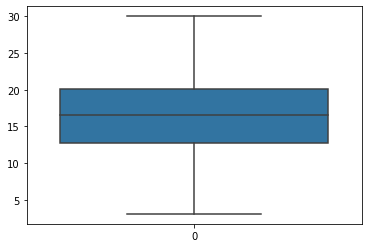

In [196]:
sns.boxplot(data=train['hour_bef_temperature'])

<AxesSubplot:>

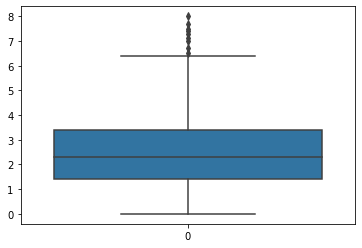

In [197]:
sns.boxplot(data=train['hour_bef_windspeed'])

<AxesSubplot:>

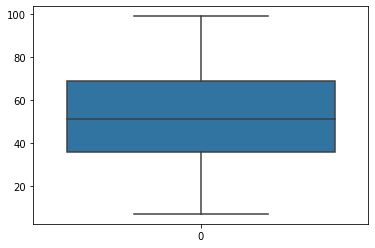

In [198]:
sns.boxplot(data=train['hour_bef_humidity'])

<AxesSubplot:>

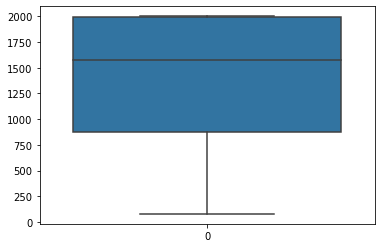

In [199]:
sns.boxplot(data=train['hour_bef_visibility'])

<AxesSubplot:>

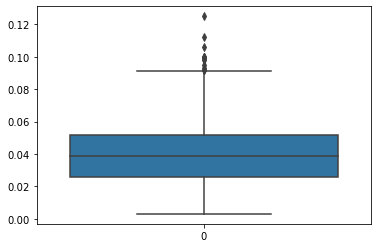

In [200]:
sns.boxplot(data=train['hour_bef_ozone'])

<AxesSubplot:>

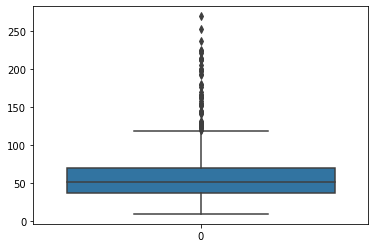

In [201]:
sns.boxplot(data=train['hour_bef_pm10'])

<AxesSubplot:>

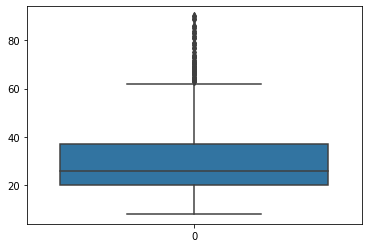

In [202]:
sns.boxplot(data=train['hour_bef_pm2.5'])

In [203]:
traina = train1

In [204]:
#'hour_bef_windspeed', 'hour_bef_ozone', 'hour_bef_pm2.5', 'hour_bef_pm10'에 outlier 존재
outli = ['hour_bef_windspeed', 'hour_bef_ozone', 'hour_bef_pm2.5', 'hour_bef_pm10']
for i in outli:
    quantile_25 = traina[i].quantile(0.25)
    quantile_75 = traina[i].quantile(0.75)
    IQR = quantile_75 - quantile_25
    minimum = quantile_25 - 1.5 * IQR
    maximum = quantile_75 + 1.5 * IQR
    traina = traina[(traina[i]>=minimum) & (traina[i] <= maximum)]
traina

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,...,0,0,0,0,0,0,1,0,0,0
1,6,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,...,0,0,0,0,0,0,0,0,0,0
2,7,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,...,0,0,0,0,0,0,0,0,0,0
4,9,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,...,0,0,0,0,1,0,0,0,0,0
5,13,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,...,0,0,0,0,0,0,0,0,0,0
1455,2175,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,...,0,0,0,0,0,0,0,0,0,0
1456,2176,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,...,0,0,0,0,0,0,0,0,0,0
1457,2178,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,...,0,0,0,0,0,0,0,1,0,0


In [205]:
#제거된 outlier 개수w
len(train1['id'])-len(traina['id'])

126

In [206]:
train_final = traina

In [216]:
#test파일 정리
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [220]:
#다 결측인 행 제거
test = test[-test['hour_bef_temperature'].isna()]
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            34
hour_bef_pm10             36
hour_bef_pm2.5            35
dtype: int64

In [221]:
test1 = pd.get_dummies(test,columns=['hour'])
test1

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2148,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
711,2149,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
712,2165,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0,0,...,0,0,0,0,0,0,0,0,0,0
713,2166,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0,0,...,0,0,1,0,0,0,0,0,0,0


In [224]:
test1[test1['hour_1']==1]
test1['hour_bef_pm2.5'] = test1['hour_bef_pm2.5'].fillna(value = 0)
test1['hour_bef_pm10'] = test1['hour_bef_pm10'].fillna(value = 0)
test1['hour_bef_ozone'] = test1['hour_bef_ozone'].fillna(value = 0)

test1[test1['hour_1']==1] = test1
test1[test1['hour_1']==1]

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
32,82,22.8,0.0,2.4,52.0,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
40,115,21.5,1.0,0.5,90.0,347.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
47,147,22.8,0.0,1.2,57.0,1190.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
86,260,20.0,0.0,2.0,65.0,1662.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
92,270,20.0,0.0,1.7,31.0,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
102,297,15.1,1.0,2.2,98.0,224.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
114,323,18.7,0.0,1.4,41.0,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
126,352,19.2,0.0,1.4,80.0,1085.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
129,358,23.6,0.0,0.9,83.0,466.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
209,609,18.6,0.0,2.4,37.0,2000.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
test1.isna().sum()

id                        0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
hour_0                    0
hour_1                    0
hour_2                    0
hour_3                    0
hour_4                    0
hour_5                    0
hour_6                    0
hour_7                    0
hour_8                    0
hour_9                    0
hour_10                   0
hour_11                   0
hour_12                   0
hour_13                   0
hour_14                   0
hour_15                   0
hour_16                   0
hour_17                   0
hour_18                   0
hour_19                   0
hour_20                   0
hour_21                   0
hour_22                   0
hour_23                   0
dtype: int64

In [229]:
x=train_final
x[x['hour_1']==1]

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
14,28,20.0,0.0,1.8,58.0,2000.0,0.0,0.0,0.0,74.0,...,0,0,0,0,0,0,0,0,0,0
46,78,12.2,0.0,3.0,49.0,1071.0,0.0,0.0,0.0,36.0,...,0,0,0,0,0,0,0,0,0,0
84,130,9.4,0.0,2.5,65.0,1907.0,0.0,0.0,0.0,39.0,...,0,0,0,0,0,0,0,0,0,0
142,208,18.8,0.0,1.1,61.0,2000.0,0.0,0.0,0.0,62.0,...,0,0,0,0,0,0,0,0,0,0
147,220,18.4,0.0,3.1,31.0,2000.0,0.0,0.0,0.0,63.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,16.6,0.0,2.1,35.0,2000.0,0.0,0.0,0.0,62.0,...,0,0,0,0,0,0,0,0,0,0
1322,1994,15.1,0.0,1.3,35.0,2000.0,0.0,0.0,0.0,40.0,...,0,0,0,0,0,0,0,0,0,0
1329,2005,17.7,0.0,1.0,43.0,1338.0,0.0,0.0,0.0,69.0,...,0,0,0,0,0,0,0,0,0,0
1361,2047,12.6,0.0,2.4,48.0,1805.0,0.0,0.0,0.0,43.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#
#결론
#값이 다 비어있는 행은 지워버림
#1시에는 오존 미세먼지 값이 없어서 다 0으로 치환
#그 외의 결측값은 가장 상관관계가 높은 컬럼 그룹별 평균값으로 대체
#outlier 132개 제외